## MLR for filling gaps in GWL data

To fill the data gaps, a MLR is performed with the closest wells 

In [1]:
#Import libraries
import pandas as pd
from scipy.spatial.distance import  cdist
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn import linear_model
from sklearn.impute import SimpleImputer

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load groundwater data 
rpath="C:/Users/GomezOspina.M/MGO/" #Root path
gwdata=pd.read_pickle(rpath+"/data/Pickle/gwdata.pkl") 

#load shapefile of stations
gwf=gpd.read_file(rpath+"/data/GIS/SHP/GWL_CDID.shp")

#Distance matrix
#dmt= pd.read_excel(rpath+ "/data/GIS/Dist_GWwells.xlsx")
#dmt["dkm"]=dmt["Distance"]/1000

In [73]:
gwdata.loc[gwdata["max_gap"]<365]

,wellid,data,count,gaps,max_gap,max_gap_months
0,9610009,MEST_ID JAHR MONAT DATUM HJAHR H...,8,761 61 days 763 61 days 766 61 days 776 ...,62.0,2.066667
1,9610709,MEST_ID JAHR MONAT DATUM HJAHR H...,9,332 92 days 350 59 days 763 61 days 776 ...,92.0,3.066667
2,9610749,MEST_ID JAHR MONAT DATUM HJAHR H...,3,763 61 days 776 62 days 799 61 days Name...,62.0,2.066667
5,9610875,MEST_ID JAHR MONAT DATUM HJAHR H...,5,758 59 days 763 61 days 788 62 days 790 ...,62.0,2.066667
6,9610879,MEST_ID JAHR MONAT DATUM HJAHR H...,8,612 92 days 623 91 days 760 61 days 763 ...,92.0,3.066667
...,...,...,...,...,...,...
738,500000367,MEST_ID JAHR MONAT DATUM HJAHR ...,35,324 92 days 337 123 days 342 91 days 3...,214.0,7.133333
740,500000530,MEST_ID JAHR MONAT DATUM HJAHR ...,4,350 90 days 756 61 days 814 92 days 816 ...,92.0,3.066667
741,500002800,MEST_ID JAHR MONAT DATUM HJAHR ...,46,324 92 days 337 123 days 342 91 days 3...,214.0,7.133333
742,600040461,MEST_ID JAHR MONAT DATUM HJAHR ...,10,350 90 days 364 213 days 605 92 days 6...,215.0,7.166667


## Distance matrix

To find the closest wells to the target one to filling the gaps, the distance matrix is computed from the shapefile of points. 

In [7]:
#Generate distance matrix
gdf = gpd.GeoDataFrame(geometry=gwf.geometry).to_crs("EPSG:4647")
dmtca=gdf.geometry.apply(lambda g: gdf.distance(g))
dmtca.columns=gwf["MEST_ID"].apply(str)
dmtca.index=gwf["MEST_ID"]
dmtca

MEST_ID,3210590,9610009,9610397,9610709,9610749,9610863,9610873,9610875,9610879,9610883,...,500000290,500000343,500000367,500000483,500000530,500002800,600040461,600040801,600041011,600041281
MEST_ID,,,,,,,,,,,,,,,,,,,,,
3210590,0.000000,54438.283662,28316.886371,79380.051775,87884.840213,43809.486229,35170.960044,27804.187784,28181.667381,27498.465085,...,144179.906869,144994.942942,170828.660984,127424.343150,140690.694568,183366.988453,209371.121209,250499.915285,232615.520115,181921.867184
9610009,54438.283662,0.000000,37343.767821,49219.296852,56971.071728,42940.446082,19553.564860,26810.084218,27185.955716,30061.600883,...,101206.797173,106904.825099,132027.613987,78750.350153,92277.421779,140900.929996,156424.829095,199730.741263,180532.540095,129320.580827
9610397,28316.886371,37343.767821,0.000000,51092.154969,59571.907723,52230.832249,24667.968825,21144.350614,14344.313756,9670.126410,...,116307.053271,116709.981821,142533.068472,101129.442806,114121.768373,155277.719753,184887.054181,224284.774103,207273.154241,157271.798279
9610709,79380.051775,49219.296852,51092.154969,0.000000,8710.676219,89372.823893,58225.264313,61667.827041,55864.543389,53858.872017,...,66115.935354,65618.376356,91448.665935,56686.494773,68047.554720,104438.154189,142406.816321,177259.057528,162390.944221,115100.170858
9610749,87884.840213,56971.071728,59571.907723,8710.676219,0.000000,97768.202808,66803.881250,70355.216446,64575.148167,62549.762116,...,58619.368325,57202.844165,82986.292283,52155.479595,62558.066299,96371.507276,137390.742520,170713.859849,156566.966370,110373.998458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500002800,183366.988453,140900.929996,155277.719753,104438.154189,96371.507276,183620.966766,156895.057290,162216.898766,157749.781794,156720.556162,...,39787.973034,40228.435312,19079.387360,65226.375028,53369.417402,0.000000,77467.665890,85680.310543,81839.679387,65081.329350
600040461,209371.121209,156424.829095,184887.054181,142406.816321,137390.742520,192732.888896,175820.590455,182820.811510,181197.376005,182201.271024,...,86899.870519,100770.765685,93761.809014,85749.259247,74928.713496,77467.665890,0.000000,50174.140368,26407.497731,27636.587754
600040801,250499.915285,199730.741263,224284.774103,177259.057528,170713.859849,238489.020796,218597.970732,225231.728469,222663.368131,223006.857205,...,113319.020866,122029.378268,104759.048393,123185.982350,110196.729507,85680.310543,50174.140368,0.000000,24399.761410,72421.784614


In [8]:
idnear

,wellid,nearwell,Distance
0,3210590,"Int64Index([3210590, 9850430, 9840751, 9851831...","[0.0, 4.682878344021208, 6.401689905158209, 7...."
1,9610009,"Int64Index([ 9610009, 9610129, 9610245, ...","[0.0, 3.408052261247657, 3.746196449855805, 3...."
2,9610397,"Int64Index([9610397, 9610459, 9853151, 9853162...","[0.0, 3.2417576152446483, 5.614793808167072, 5..."
3,9610709,"Int64Index([ 9610709, 9610571, 9610675, ...","[0.0, 7.297781309420163, 7.478517200949665, 7...."
4,9610749,"Int64Index([ 9610749, 9610751, 9610743, ...","[0.0, 7.242101760298149, 7.5938187514980635, 8..."
...,...,...,...
957,500002800,"Int64Index([500002800, 500000058, 500003073, 5...","[0.0, 2.3953019518438254, 5.0009871929443435, ..."
958,600040461,"Int64Index([600040461], dtype='int64', name='M...",[0.0]
959,600040801,"Int64Index([600040801, 600040699, 600041831], ...","[0.0, 11.90517897948832, 17.6522422812438]"
960,600041011,"Int64Index([600041011, 600041120, 600040699], ...","[0.0, 6.444346953615914, 14.29345944278385]"


In [9]:
#maximum distance to search for a well
d=2*10e3 #meters

idv=[]
ids=dmtca.columns[:]
val=[]
for i in ids:
    sort_dm=dmtca[i].sort_values()
    dmtca_bol=sort_dm < d
    idlist=dmtca_bol==True
    values=sort_dm.loc[dmtca_bol == True].values/1000 #km
    idv.append(idlist.loc[dmtca_bol == True].index)
    val.append(values)
dic_id={"wellid": ids, "nearwell":idv, "Distance":val}
#Dataframe for the nearest wells according to fixed distance
idnear=pd.DataFrame(dic_id)
    

## Built dataset

In [10]:
gwdataset=gwdata[gwdata['wellid'].isin(idnear.nearwell[0])]

In [112]:
twell=600041281  # Only select the ones that are no nan in max_gap

In [113]:
iwell=gwdata.data[gwdata["wellid"]==twell].index[0]
data_twell=gwdata.data[gwdata["wellid"]==twell]
dfwell=data_twell[iwell] #Dataframe of the target well

In [114]:
gwdata.data[gwdata["wellid"]==twell]

744           MEST_ID  JAHR  MONAT      DATUM  HJAHR ...
Name: data, dtype: object

<IPython.core.display.Javascript object>


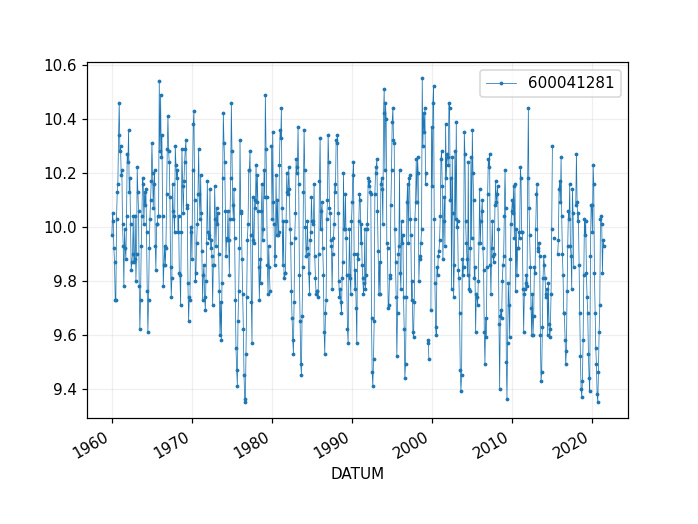

In [115]:
dfwell.plot(x="DATUM", y="GW_NN", marker=".", markersize=3, linewidth=.5, label=str(twell))
plt.grid(True, alpha=0.2)

In [116]:
#Indexes where the target well has to be filled
nanindex=dfwell.loc[dfwell.GW_NN.isnull()].index
nonani=dfwell.loc[~dfwell.GW_NN.isnull()].index

#Begining of the series
fnonan=dfwell.GW_NN.first_valid_index()
lastnonan=dfwell.GW_NN.last_valid_index()

#Dates of target well
datestwell=dfwell.DATUM.loc[fnonan:lastnonan]
#Date where the target well has to be filled. 
dates_nan=dfwell.DATUM.iloc[dfwell.loc[dfwell.GW_NN.isnull()].index]
datesnan=dates_nan.loc[fnonan:lastnonan]

In [117]:
#List of wells near the target well
lwells=idnear.nearwell[idnear["wellid"]==str(twell)].values[0][1:] # Exclude the first well since it's the same target well

In [118]:
#Create dataframe with reference dates from the target well to join the remaining datasets. 
filldf=pd.DataFrame({"DATUM":dfwell.DATUM.loc[fnonan:lastnonan]})
for w in lwells:
    series=gwdata.data[gwdata["wellid"]==w] 
    if not series.empty: # Remove wells with no information
        #ask for data at the wellid
        wellind=gwdata.data[gwdata["wellid"]==w].index[0]
        welldata=gwdata.data[gwdata["wellid"]==w][wellind]
        
        #join data into the filldf dataframe
        mergedf=pd.merge(welldata[["DATUM","GW_NN"]],filldf, on=["DATUM"])
        mergedf.rename(columns={"GW_NN":"GW_NN_"+str(w)}, inplace= True)
        
        filldf=mergedf

    else:
        print("empty")


In [119]:
mergedf["twell_"+str(twell)]=dfwell.GW_NN.loc[fnonan:lastnonan].values

In [120]:
#Training dataset
maxn=8 # number of wells to consider for the MLR / filling data
thresh=int(len(mergedf)*0.98) # threshold to drop columns with nan values, 
                                #fixed to 95%, meaning that only columns with 95% of the data as no-nan are kept
nonanmerge=mergedf.dropna(axis=1, thresh=thresh)

#Use simple imputation to fillout data 
nonanmerge2=nonanmerge.copy()
col=nonanmerge2.columns
fillednan=nonanmerge2[col].fillna(nonanmerge2[col].mean())
fillednan[mergedf.columns[-1]]=mergedf[mergedf.columns[-1]]
dftest=fillednan.dropna()

#Prediction dataset
mergedfm=mergedf[mergedf.DATUM.isin(datesnan)]
mergedf2=mergedfm.dropna(axis=1)
#mergedf2["twell_"+str(twell)]=dfwell.GW_NN.loc[fnonan:lastnonan]

## MLR Model

In [121]:
auxdf=dftest[dftest.columns[:-1]] #Exclude twell column
X = auxdf[auxdf.columns[1:maxn+1]]
y = dftest[dftest.columns[-1]]

In [122]:
X.empty
from sklearn.model_selection import train_test_split

In [123]:
if not X.empty:
    X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                                        test_size = 0.20,\
                                                                        random_state = 5)
    model1 = linear_model.LinearRegression().fit(X_train, y_train)
    print(model1.score(X_test, y_test))
    predictdf=fillednan[fillednan["twell_"+str(twell)].isna()]
    auxdf2=predictdf[predictdf.columns[:-1]] #Exclude twell column
    X_predct=auxdf2[auxdf2.columns[1:maxn+1]]
    predictions = model1.predict(X_predct)
    predictdf["twell_"+str(twell)]=predictions
    dftest2=dftest.combine_first(predictdf[["DATUM", "twell_"+str(twell)]])
else:
    print("No wells avaialble for model prediction")

No wells avaialble for model prediction


<IPython.core.display.Javascript object>


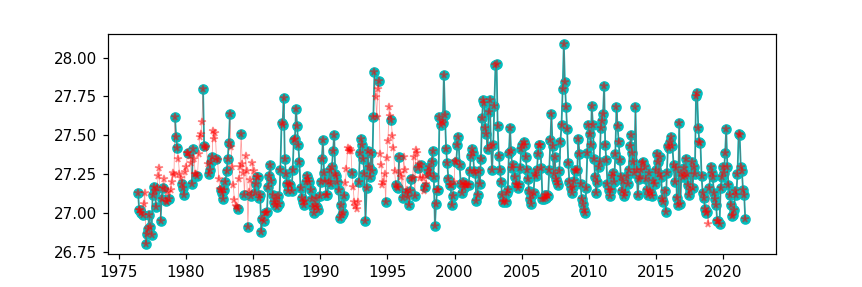

In [110]:
if not X.empty:
    plt.figure()
    plt.plot(mergedf["DATUM"],mergedf["twell_"+str(twell)],marker=".",markersize="12", linewidth="1.2", color="c")
    plt.plot(dftest2["DATUM"], dftest2["twell_"+str(twell)], marker="*",markersize="5",linewidth="0.5", color="r", alpha=0.4)

In [111]:
dftest2.loc[dftest2["twell_"+str(twell)].isna()]

,DATUM,GW_NN_40000231,GW_NN_40000233,GW_NN_500001522,GW_NN_500003019,twell_500000367
